In [237]:
import matplotlib.pyplot as plt
import numpy as np

from Polytope import Polytope
from symmetric import *
from far_point import *
from make_cube import *

%matplotlib inline
plt.figure(figsize=(18, 16))
dim = 10

poly = make_cube(dim, options = Options())
# poly = symmetric(dim, 2*dim, options = Options())

lines = poly.reflection_lines(10000)
print("DONE")

0 1.9926724069581352
1000 0.04026856398622859
2000 0.01246301975736485
3000 0.01803998705802989
4000 0.007353928200771339
5000 0.008642186549397631
6000 0.0038844597209197365
7000 0.006340936219083842
8000 0.003565607280874657
9000 0.004355301572068307
DONE


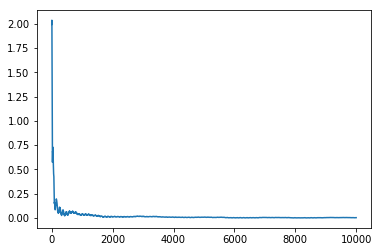

In [238]:
#8131, 8154, 8170
left = 0
right = 10000

xs = [x for x in range(len(poly.centroid_distance))]
ys = poly.centroid_distance
plt.plot(xs[left:right], ys[left:right])
plt.show()

In [170]:
from scipy.optimize import linprog
def marginal_width(poly, direction):
    # how far can I go in the direction and still be in the polytope?
    d = 0.01
    minim = 0
    maxim = 10
    while abs(minim - maxim) > 1e-3:
        d = (minim + maxim) / 2
        
        A = np.vstack([poly.A, direction])
        b = np.append(poly.b, -np.dot(direction,
                                     poly.point + d * direction))
        res = linprog(direction, A_ub=A, b_ub=b, bounds=(None,None))
        if res.status == 2:
            maxim = d
        else:
            minim = d
    
    return minim


In [171]:
def get_farthest(poly, direction): 
    return poly.get_plane_hit(np.zeros(dim), direction, last_plane_hit = -1)

In [172]:
far = marginal_width(poly, avg)
print(far)

8.046875


In [239]:
far = []
for i in range(20): 
    d = np.random.uniform(-1,1,dim)
    d /= np.linalg.norm(d)
    far.append(marginal_width(poly, d))
    print(far[-1])
print("mean", np.mean(far))
print("std dev", np.std(far))

3.045654296875
2.698974609375
2.40966796875
2.7093505859375
2.735595703125
2.7996826171875
2.9779052734375
2.8204345703125
2.9241943359375
2.6361083984375
2.9638671875
2.745361328125
2.8900146484375
2.640380859375
2.8070068359375
2.6715087890625
2.7880859375
2.9522705078125
2.4029541015625
2.8656005859375
mean 2.77423095703125
std dev 0.16757136289029118


In [240]:
def find_peaks(pts): 
    peaks = []
    for i in range(len(pts) - 25): 
        if i <= 50: continue
        more = 0
        less = 0
        cur = np.linalg.norm(pts[i])
        for k in range(-25,25): 
            if np.linalg.norm(pts[i+k]) > cur: 
                more += 1
            if np.linalg.norm(pts[i+k]) < cur:
                less += 1
        if more == 0 or less == 0: 
            peaks.append(i)
    return peaks

In [241]:
peaks = find_peaks(ys)

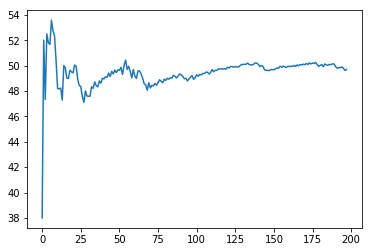

In [242]:
# print(peaks)
width = []
for i in range(1,len(peaks)): 
    width.append(peaks[i] - peaks[i-1])
width = [np.mean(width[:i+1]) for i in range(len(width))]
plt.plot(range(len(width)), width)

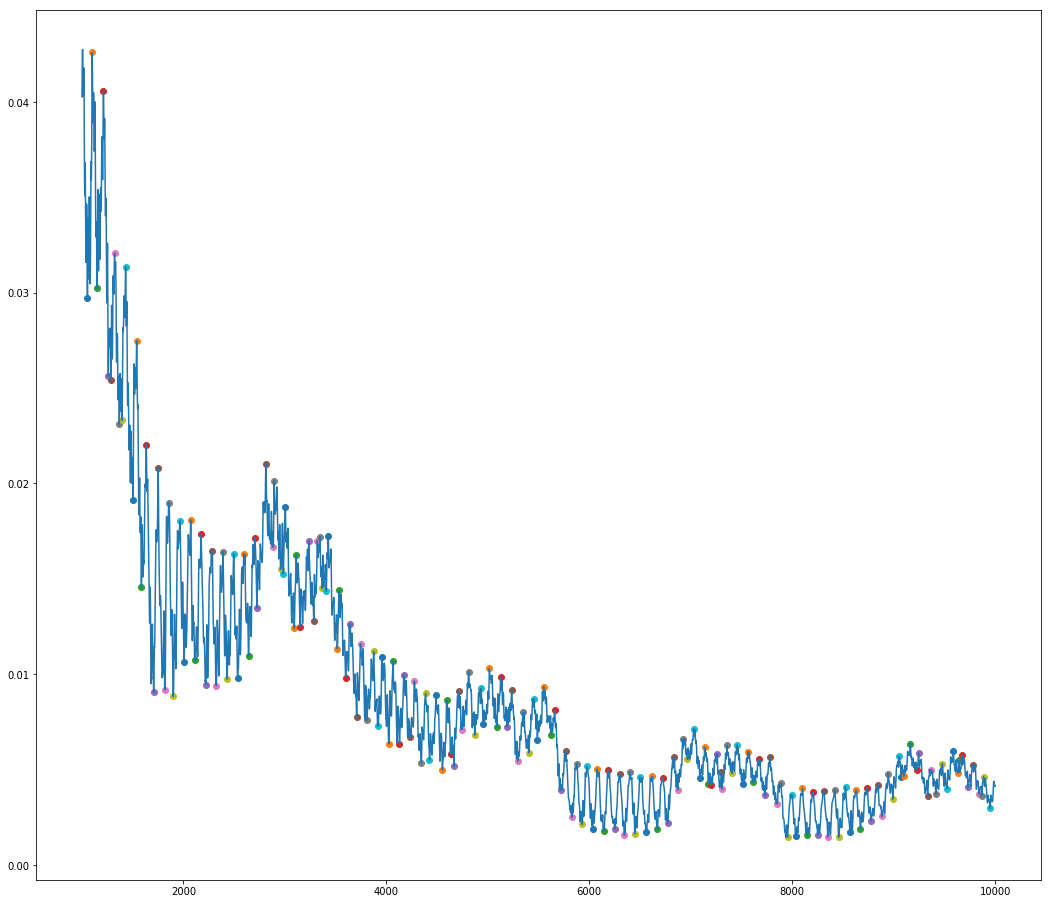

In [243]:
plt.figure(figsize=(18, 16))
for i in range(len(peaks)): 
    if peaks[i] >= 1000: 
        plt.scatter(peaks[i], ys[peaks[i]])
plt.plot(xs[1000:], ys[1000:])

In [263]:
xs = [x for x in range(len(poly.centroid_distance))]
ys = poly.centroid_distance
far_points = []
for i in range(1, len(peaks)): 
    left = peaks[i-1]
    right = peaks[i]

    pts = poly.pts[left:right]
    avg = np.zeros(dim)
    for p in pts: 
        avg += p
    avg /= len(pts)
    avg /= np.linalg.norm(avg)
    
    far_points.append(marginal_width(poly, avg))
print("mean", np.mean(far))
print("std dev", np.std(far))

mean 2.77423095703125
std dev 0.16757136289029118


In [266]:
A = poly.A 
b = poly.b
dim = 10
delta = 0.01 / dim
radius = 0.1
depth = 0
ball_poly = Polytope(A, b, np.zeros(dim), options = Options(reflection = "sphere", \
                        delta = delta, radius = radius, depth = depth))
ball_lines = ball_poly.reflection_lines(10000)

0 1.5684800148962812


/home/nbuser/library/Plane.py:47: RuntimeWarning: invalid value encountered in sqrt
  b = np.sqrt(b)
/home/nbuser/library/create_basis.py:7: RuntimeWarning: invalid value encountered in greater
  if (abs(w) > 1e-10).any():


64 HIT
94 HIT
1000 0.16673324433961378
2000 0.02993068612756665
54 HIT
49 HIT
61 HIT
39 HIT
41 NO HIT
102 HIT
57 HIT
117 HIT
37 HIT
37 HIT
57 HIT
69 HIT
41 HIT
35 HIT
31 HIT
66 HIT
3000 0.09426768367387178
37 HIT
68 HIT
94 NO HIT
4000 0.09116601001409894
5000 0.07350451109317431
31 HIT
41 HIT
161 NO HIT
55 HIT
65 HIT
69 HIT
58 HIT
6000 0.06379902473677332
34 HIT
51 HIT
76 HIT
31 HIT
61 HIT
32 HIT
37 HIT
36 HIT
43 HIT
59 HIT
41 HIT
82 HIT
31 HIT
44 HIT
54 HIT
31 HIT
38 HIT
47 HIT
35 HIT
7000 0.07163201845276015
8000 0.06143709997398394
84 HIT
34 HIT
9000 0.05927651468579256
57 NO HIT
58 HIT


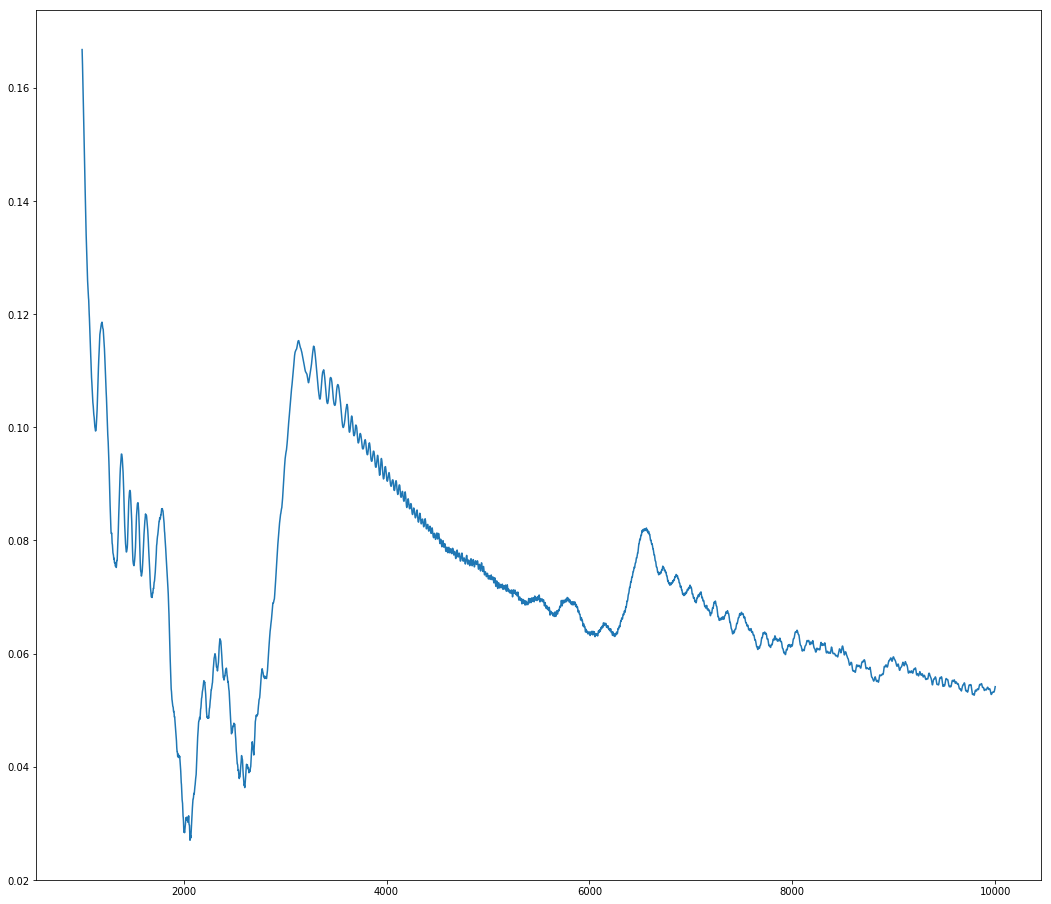

In [270]:
#8131, 8154, 8170
plt.figure(figsize=(18, 16))
left = 1000
right = 10000

ball_xs = [x for x in range(len(ball_poly.centroid_distance))]
ball_ys = ball_poly.centroid_distance
plt.plot(ball_xs[left:right], ball_ys[left:right])
plt.show()